# ZOMATO RESTAURANT RATINGS END TO END DEPLOYMENT

# PERFORMING EDA ON ZOMATO DATASET

In [4]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
#load dataset
data = pd.read_csv('zomato.csv')
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [7]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [9]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Columns Description**


url contains the url of the restaurant in the zomato website

address contains the address of the restaurant in Bengaluru

name contains the name of the restaurant

online_order whether online ordering is available in the restaurant or not

book_table table book option available or not

rate contains the overall rating of the restaurant out of 5

votes contains total number of rating for the restaurant as of the above mentioned date

phone contains the phone number of the restaurant

location contains the neighborhood in which the restaurant is located

rest_type restaurant type

dish_liked dishes people liked in the restaurant

cuisines food styles, separated by comma

approx_cost(for two people) contains the approximate cost of meal for two people

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed

In [11]:
data.shape

(51717, 17)

In [14]:
data.dtypes #checking data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [15]:
data.isnull().sum() #checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
df = data.drop(['phone', 'url'], axis=1) #Deleting Unnecessary columns and saving the new dataset in df variable

**Checking for duplicate values**

In [19]:
df.duplicated().sum()

43

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

**Dropping null values**

In [23]:
df.dropna(how='any', inplace=True) #Removes NAN values from the dataset
df.isnull().sum() 

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Renaming columns appropriately**

In [25]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [27]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

**Cleaning the dataset**

In [28]:
#Reading unique values from the Cost column
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [29]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [30]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [31]:
#Reading unique values from the rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
df = df.loc[df.rate !='NEW'] #getting rid of "NEW"

In [33]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [34]:
#Removing '/5' from Rates
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [35]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

# VISUALISATIONS

**Famous restaurants chains in Bangalore**

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\1710069579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


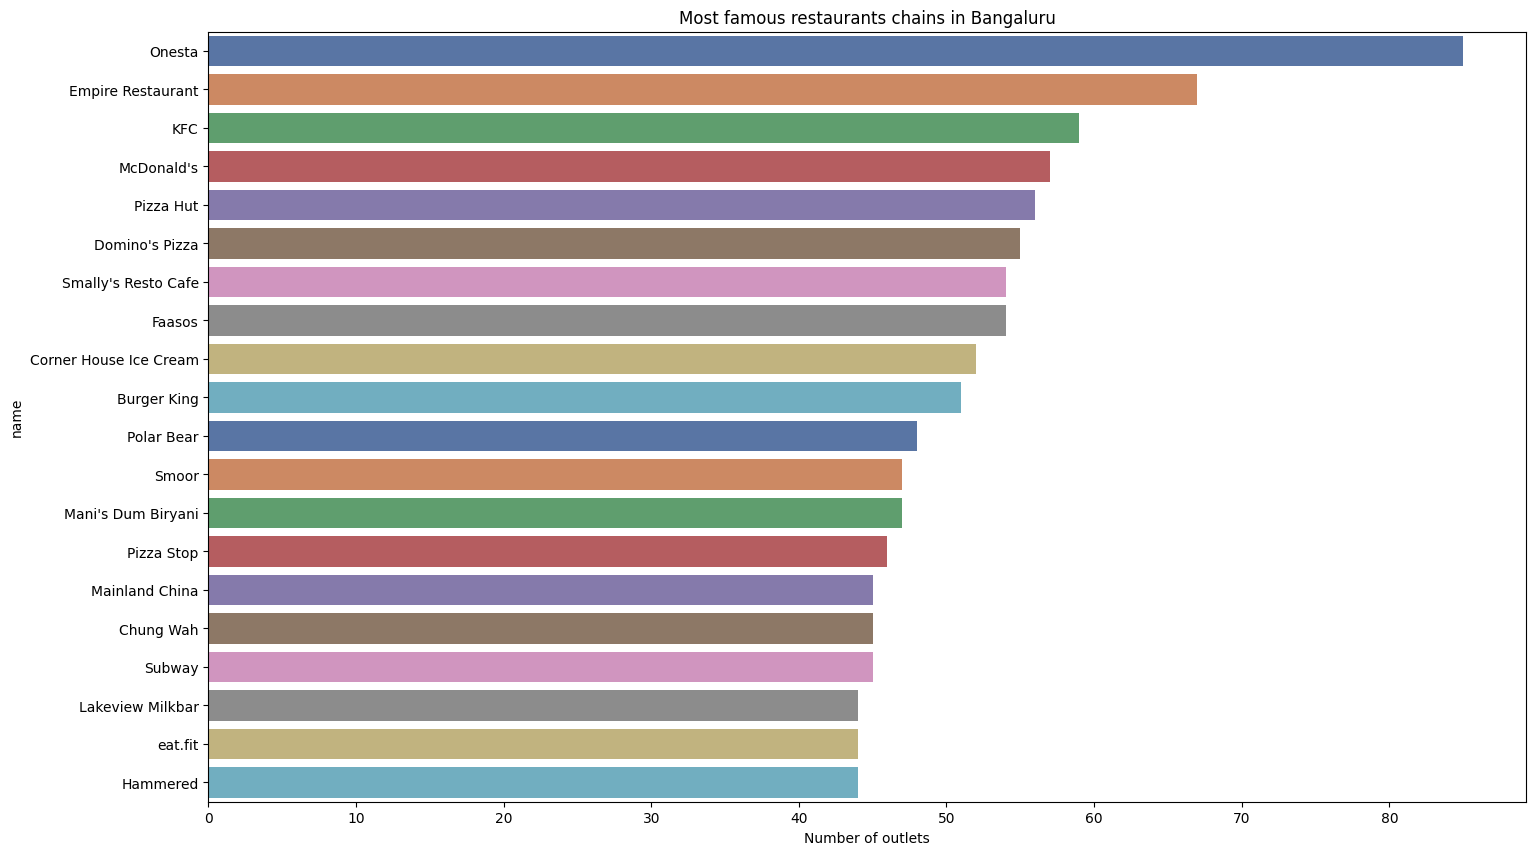

In [36]:
plt.figure(figsize=(17, 10))
chains = df['name'].value_counts() [:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.show()

**Restaurant offers table booking or not**

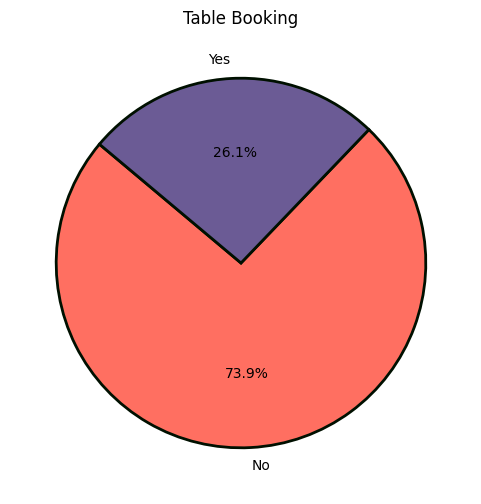

In [44]:
# Pie chart
colors = ['#FF6F61', '#6B5B95']  # Same colors as used in Plotly

plt.figure(figsize=(6, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', colors=colors, startangle=140, 
        wedgeprops={'linewidth': 2, 'edgecolor': '#001000'})
plt.title("Table Booking")
plt.show()

**Restaurant deliver online or not**

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\1480307521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette=colors)


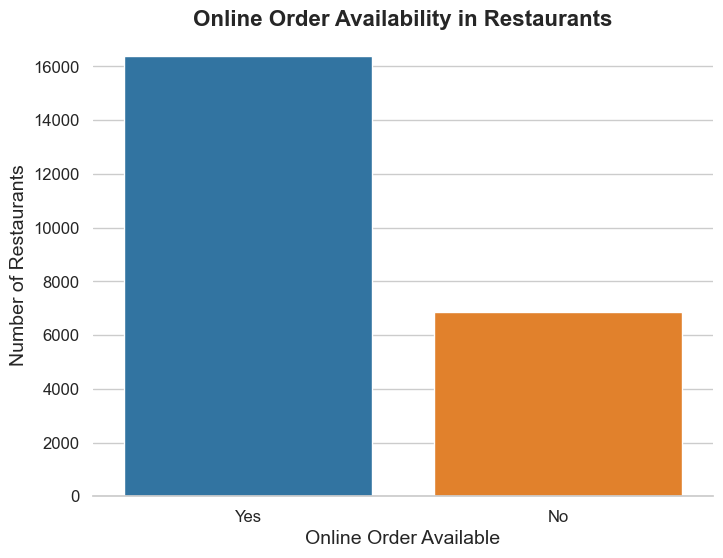

In [47]:
sns.set(style="whitegrid")
colors = ['#1f77b4', '#ff7f0e']  # Attractive contrasting colors

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['online_order'], palette=colors)

plt.title('Online Order Availability in Restaurants', fontsize=16, fontweight='bold')
plt.xlabel('Online Order Available', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.show()

# Ratings Distribution

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\1382033877.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],bins=20)


<Axes: xlabel='rate', ylabel='Density'>

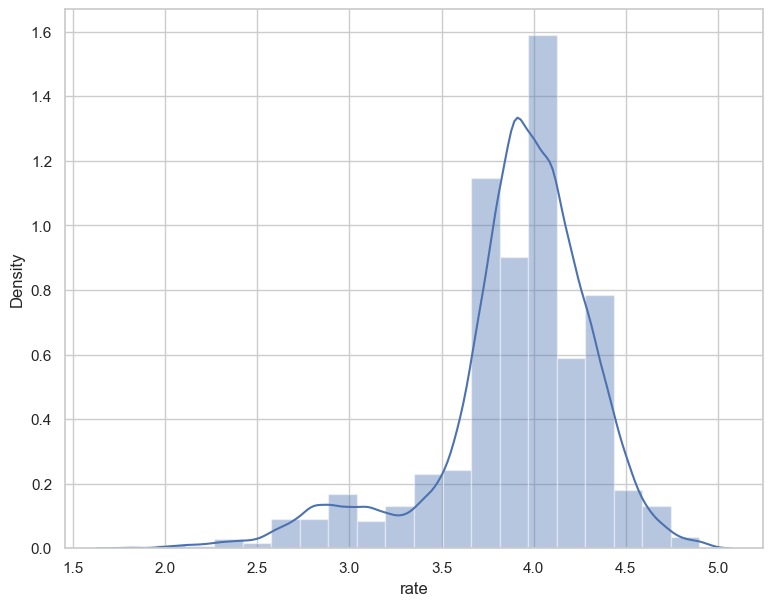

In [48]:
plt.figure(figsize=(9,7)) #how ratings are distributed

sns.distplot(df['rate'],bins=20)

**Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"**

In [49]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [50]:
df['rate'].min()

'1.8'

In [51]:
df['rate'].max()

'4.9 '

In [52]:
df['rate']=df['rate'].astype(float)

In [53]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [54]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [56]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [58]:
(df['rate']>=4).sum()

11911

**Plotting the counts with the help of Pie Chart**

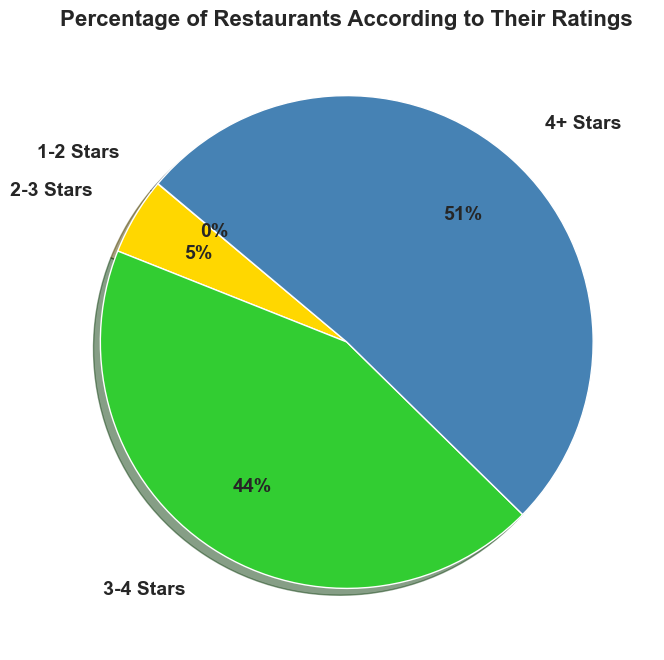

In [61]:
slices = [
    ((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
    ((df['rate'] >= 2) & (df['rate'] < 3)).sum(),
    ((df['rate'] >= 3) & (df['rate'] < 4)).sum(),
    (df['rate'] >= 4).sum()
]

labels = ['1-2 Stars', '2-3 Stars', '3-4 Stars', '4+ Stars']
colors = ['#FF6347', '#FFD700', '#32CD32', '#4682B4'] 

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(slices, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.7, 
        labeldistance=1.2, shadow=True, startangle=140, textprops={'fontsize': 14, 'weight': 'bold'})

plt.title("Percentage of Restaurants According to Their Ratings", fontsize=16, fontweight='bold')

plt.show()


# Services

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\476297107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette=colors)


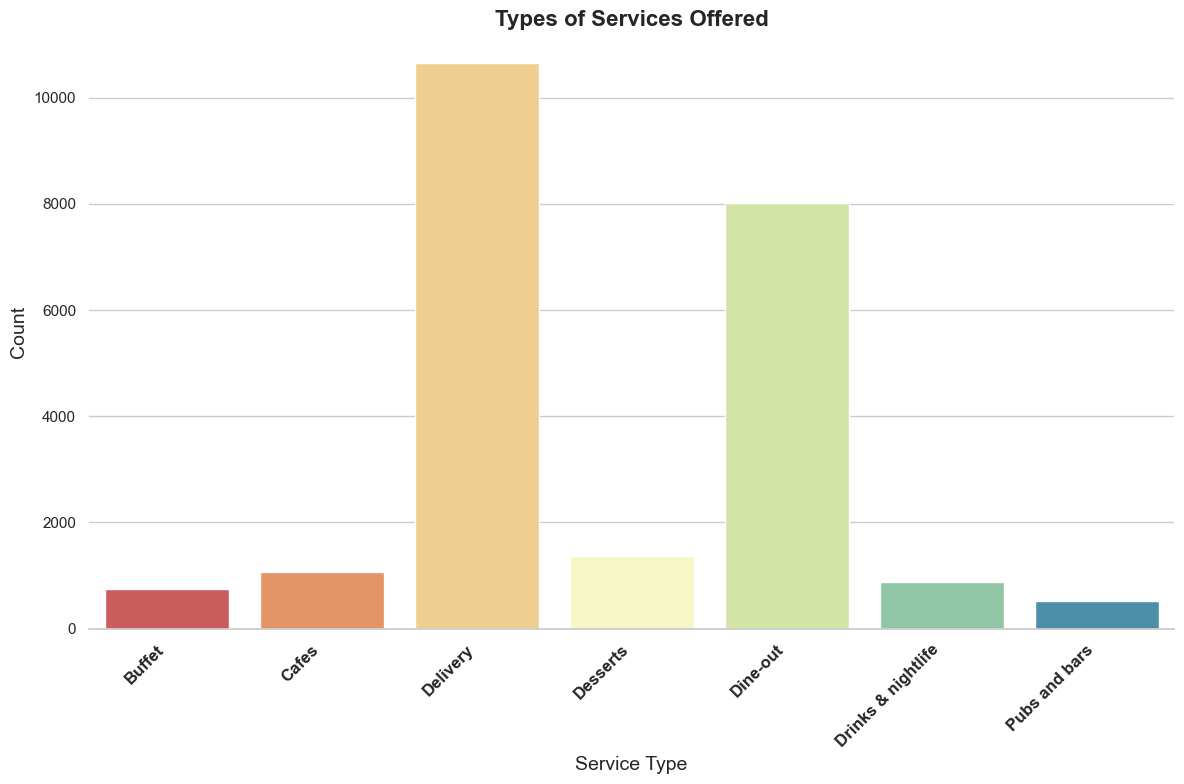

In [65]:
#Types of Services
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("Spectral", len(df['type'].unique()))
sns.countplot(x=df['type'], palette=colors)

plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')

plt.title('Types of Services Offered', fontsize=16, fontweight='bold')

plt.ylabel('Count', fontsize=14)
plt.xlabel('Service Type', fontsize=14)

plt.tight_layout()
sns.despine(left=True)
plt.show()


**Distribution of Cost of Food for two People**

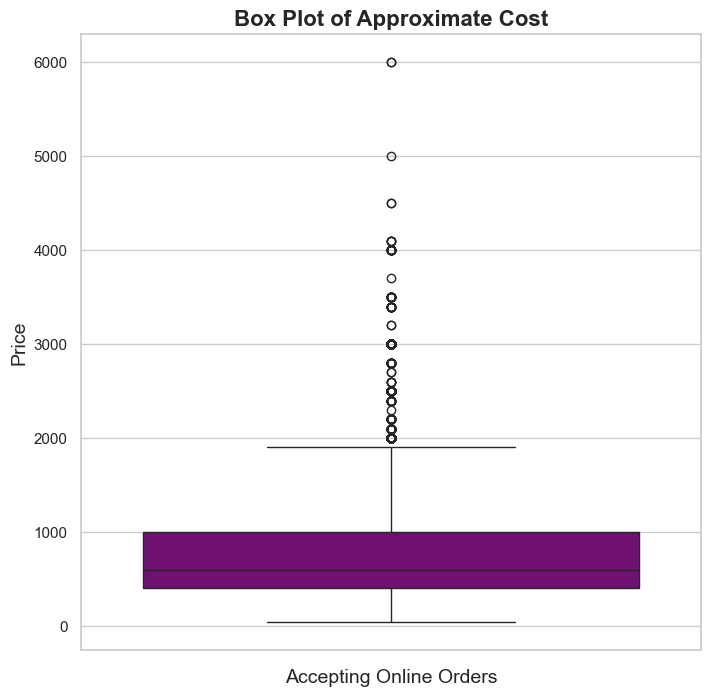

In [68]:
sns.set(style="whitegrid")

# box plot
plt.figure(figsize=(8, 8))
sns.boxplot(y=df['cost'], color='purple') 

plt.title('Box Plot of Approximate Cost', fontsize=16, fontweight='bold')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Accepting Online Orders', fontsize=14)  # Mimics the original label

plt.show()


**Distribution of Charges**

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\4096135236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


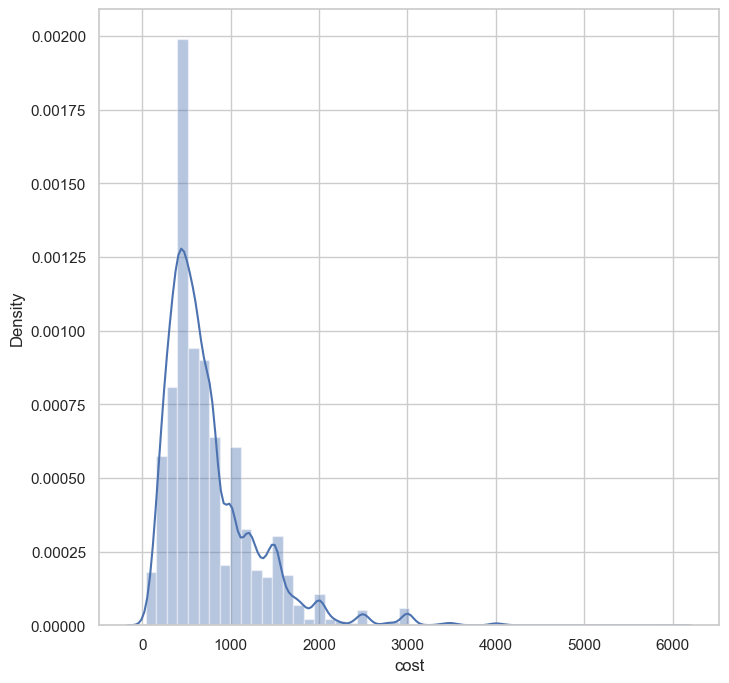

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

# Most liked Dishes

In [70]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)
     

In [71]:
df.index=range(df.shape[0])

In [72]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [73]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
Name: count, dtype: int64

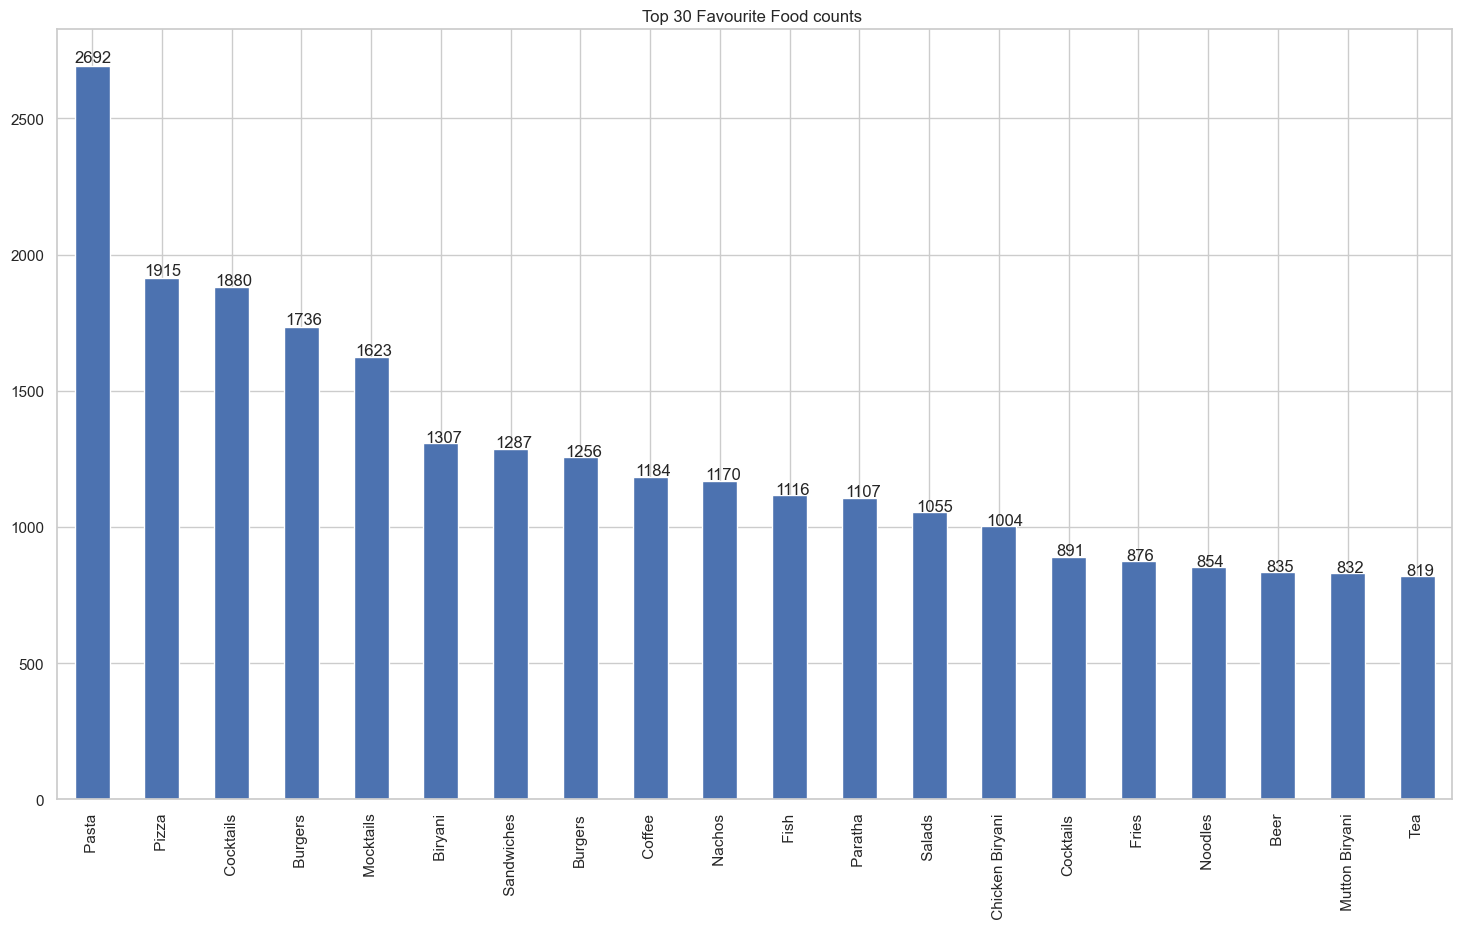

In [74]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

# Building our model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [94]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


**Convert the online_order categorical values into a numeric format**

In [95]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\1438068132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'Yes'] = 1
C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\1438068132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'No'] = 0


In [96]:
df.online_order.value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [97]:
df.online_order = pd.to_numeric(df.online_order)

**Change the string categorical into the categorical int**

In [98]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\2276401079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_table[df.book_table == 'Yes'] = 1
C:\Users\Pranav\AppData\Local\Temp\ipykernel_2216\2276401079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_table[df.book_table == 'No'] = 0


In [99]:
df.book_table = pd.to_numeric(df.book_table)

In [100]:
df.book_table.value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [103]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [104]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')     

In [105]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [106]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

# Linear Regression

In [113]:
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [114]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.2281882852296726

# Random Forest

In [118]:
# from sklearn.ensemble import RandomForestRegressor
# RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
# RF_Model.fit(x_train,y_train)
# y_predict=RF_Model.predict(x_test)
# r2_score(y_test,y_predict)

# Extra Tree Regressor

In [120]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

#Extra Tree Regressor gives us the best model

0.9330272517958742

In [ ]:
import pickle
pickle.dump(ET_Model, open('model.pkl', 'wb'))